In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
def plot_compare(*args):
    L = len(args)

    if (L == 0):
        return None
    elif (L == 1):
        f = plt.figure(figsize=(15,15))
        plt.imshow(args[0])
        plt.axis('off')
    else:
        f, axs = plt.subplots(1, L, figsize=(15,15*L))
        for i, ax in enumerate(axs):
            ax.imshow(args[i])
            ax.axis('off')
    plt.show()
    return f 

### Item 2

Repita o mesmo procedimento acima para 3 tipos de descritores, incluindo o SIFT.

#### Minha análise

Eu preferi o descritor SIFT, já que ele trouxe mais matches nos keypoints. Além disso, na minha pesquisa, vi que ele gera excelentes descritores, o que torna ele melhor para matching, caso não seja problema o custo computacional mais alto dele. Utilizei os parâmetros padrão para todos os descritores. O ORB e o AKAZE são melhores pra aplicações que dependem de processamento em tempo real, mas não fizeram tantas matches e principalmente o ORB tem descritores piores que o SIFT por serem binários (menor precisão e dimensionalidade).

#### Imagens de Exemplo

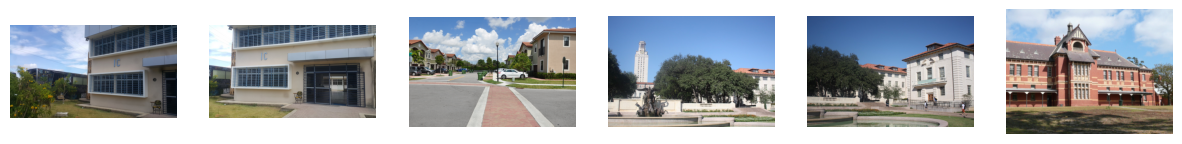

In [3]:
images = [cv2.cvtColor(cv2.imread(f'images/{i}.jpg'), cv2.COLOR_BGR2RGB) for i in range(1,6+1)]

original = plot_compare(*images)
original.savefig("./results/original.jpg", dpi=300, bbox_inches='tight', pad_inches=0.1)

### SIFT

O algoritmo SIFT (Scale-Invariant Feature Transform) é uma técnica amplamente utilizada para detectar e descrever características distintivas em imagens. Desenvolvido por David Lowe em 1999, o SIFT revolucionou a área de visão computacional, oferecendo uma maneira robusta e eficaz de identificar pontos de interesse em imagens. O funcionamento do algoritmo SIFT é baseado em vários passos fundamentais. Inicialmente, ele identifica pontos-chave em uma imagem, conhecidos como keypoints, que são locais de interesse significativos, independentes de escala e rotação. Em seguida, o SIFT calcula descritores para cada keypoint, que são vetores numéricos que capturam as características únicas da região ao redor do keypoint.

Os principais parâmetros do SIFT incluem:

Threshold: Este parâmetro define um valor mínimo para a intensidade de um ponto ser considerado um keypoint. Pontos com intensidades abaixo desse limiar são descartados.

Número de níveis de pirâmide: O SIFT constrói uma pirâmide de escalas para detectar keypoints em diferentes níveis de detalhe da imagem.

Uma das principais vantagens do SIFT é sua invariância à escala e à rotação, já que O SIFT constrói uma pirâmide de escalas para detectar keypoints em diferentes níveis de detalhe da imagem. Isso significa que ele pode identificar os mesmos keypoints mesmo quando a imagem é escalada ou rotacionada. Além disso, o SIFT é robusto a mudanças na iluminação e a pequenas variações de perspectiva.

No entanto, o SIFT também possui algumas limitações. Ele pode ser computacionalmente intensivo, especialmente ao trabalhar com grandes conjuntos de dados de imagens. Além disso, a patente associada ao SIFT traz algumas restrições para seu uso comercial.



In [4]:
sift_detector = cv2.SIFT_create()

def draw_sift(image):
    result = image.copy()
    
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = sift_detector.detectAndCompute(gray,None)
    
    return cv2.drawKeypoints(result, keypoints, None, color=(255,0,0))

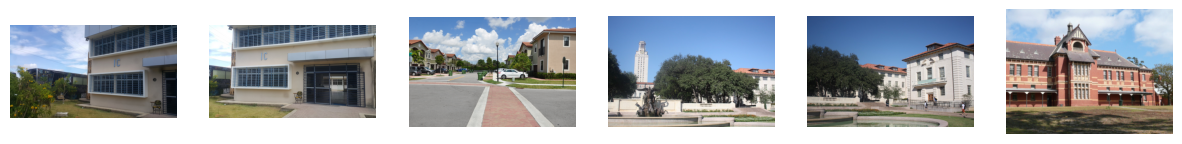

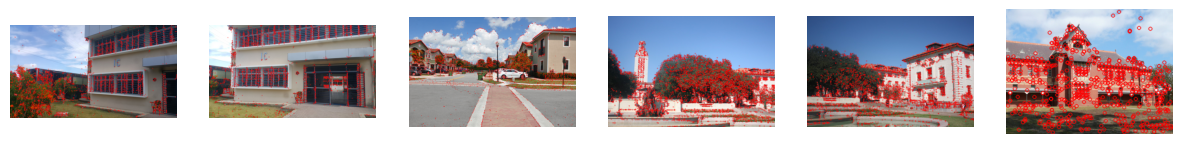

In [5]:
sift_images = [draw_sift(image) for image in images]

plot_compare(*images)

sift = plot_compare(*sift_images)
sift.savefig("./results/sift.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)

### ORB

O algoritmo ORB (Oriented FAST and Rotated BRIEF) é uma técnica moderna e eficiente para a detecção e descrição de keypoints em imagens. Desenvolvido por Ethan Rublee, Vincent Rabaud, Kurt Konolige e Gary R. Bradski em 2011, o ORB foi projetado para oferecer desempenho robusto e velocidade superior em comparação com métodos mais tradicionais. O ORB utiliza uma versão otimizada do algoritmo FAST (Features from Accelerated Segment Test) para identificar keypoints. Esta etapa é rápida e eficiente, tornando o ORB adequado para aplicações em tempo real. Depois de detectar os keypoints, o ORB calcula a orientação desses pontos para tornar a descrição invariante à rotação. Em seguida, o ORB utiliza o algoritmo BRIEF (Binary Robust Independent Elementary Features) para calcular descritores binários para cada ponto de interesse. Esses descritores são vetores binários que capturam as características distintivas da região ao redor do ponto de interesse.

Principais parâmetros do ORB:

Número de keypoints: Este parâmetro controla o número de keypoints que serão detectados em uma imagem. Um número maior de keypoints pode resultar em uma correspondência mais precisa, mas também aumenta o custo computacional.

Tamanho do patch: O ORB utiliza uma janela em torno de cada ponto de interesse para calcular seus descritores. O tamanho dessa janela pode afetar a precisão e a robustez dos descritores gerados.

Graças à sua abordagem simplificada e à utilização de operações binárias, o ORB é considerado de baixo custo computacional e é capaz de detectar e descrever keypoints em tempo real, o que constitui uma grande vantagem. Por outro, como os descritores são binários e não levam em consideração as diferenças de intensidade dos pixels, o ORB pode ser menos discriminativo em comparação com métodos que utilizam descritores de maior dimensionalidade, o ORB também não é tão robusto em ambientes com grandes variações de iluminação ou em imagens com texturas repetitivas.

In [6]:
orb_detector = cv2.ORB_create()

def draw_orb(image):
    result = image.copy()
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    keypoints, descriptors = orb_detector.detectAndCompute(gray,None)
    result = cv2.drawKeypoints(result, keypoints, None, color=(255,0,0))

    return result

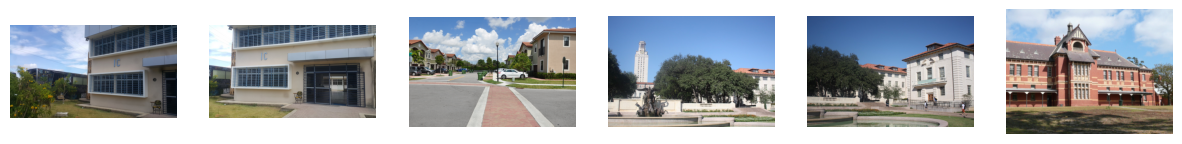

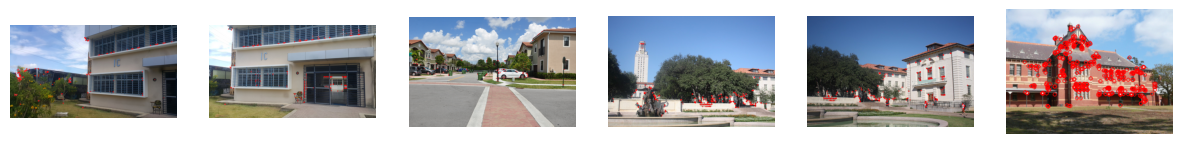

In [7]:
orb_images = [draw_orb(image) for image in images]

plot_compare(*images)

orb = plot_compare(*orb_images)
orb.savefig("./results/orb.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)

### AKAZE

O algoritmo de detecção de características AKAZE (Accelerated-KAZE) é uma evolução significativa no campo da visão computacional, baseado no trabalho original de Pablo F. Alcantarilla, Adrien Bartoli e Andrew J. Davison em 2012. Em seu funcionamento, o AKAZE emprega uma técnica avançada que combina aceleração e escalabilidade. Ele realiza a detecção e descrição de pontos de interesse através da análise da distribuição de gradientes em diferentes escalas e orientações. Em essência, o AKAZE calcula uma representação multi-escala de cada região da imagem, permitindo a detecção de características em uma variedade de tamanhos e orientações. Ao contrário de muitos outros algoritmos, o AKAZE não depende da construção de pirâmides de imagens para realizar a detecção em diferentes escalas, o que o torna mais eficiente computacionalmente. Além disso, ele é capaz de lidar com imagens em movimento e variações de iluminação de maneira eficaz, tornando-o uma escolha ideal para aplicações em tempo real.

Os principais parâmetros do AKAZE incluem:

Tamanho do descritor: Este parâmetro controla o tamanho do descritor gerado para cada ponto de interesse detectado. O tamanho do descritor influencia a quantidade de informações incluídas na descrição de cada ponto.

Tamanho do detector: Este parâmetro determina o tamanho da região utilizada para detectar pontos de interesse. Um tamanho maior pode resultar em uma detecção mais robusta, especialmente em regiões com textura complexa, mas também pode aumentar o tempo de processamento.

Threshold: Define um valor mínimo para a resposta do ponto de interesse. Pontos com uma resposta abaixo desse valor não são considerados pontos de interesse.

Threshold: Define um valor mínimo para a resposta do ponto de interesse. Pontos com uma resposta abaixo desse valor não são considerados pontos de interesse.

O AKAZE possui várias vantagens distintas. Ele é altamente robusto a variações de iluminação, rotação e escala, e é capaz de detectar pontos de interesse em diferentes orientações e ambientes. Além disso, o AKAZE tem uma excelente capacidade de generalização e pode ser aplicado a uma ampla gama de problemas de visão computacional.

No entanto, assim como outros algoritmos, o AKAZE também apresenta algumas limitações. Por exemplo, pode ter dificuldade em lidar com imagens de baixa qualidade ou com alta taxa de ruído. Além disso, em comparação com alguns métodos mais simples, o AKAZE pode ser mais exigente em termos de recursos computacionais, especialmente em aplicações que exigem tempo de processamento em tempo real.

In [8]:
akaze_detector = cv2.AKAZE_create()

def draw_akaze(image):
    result = image.copy()
    gray = cv2.cvtColor(result, cv2.COLOR_RGB2GRAY)

    keypoints = akaze_detector.detect(gray)
    result = cv2.drawKeypoints(result, keypoints, None, color=(255,0,0))

    return result

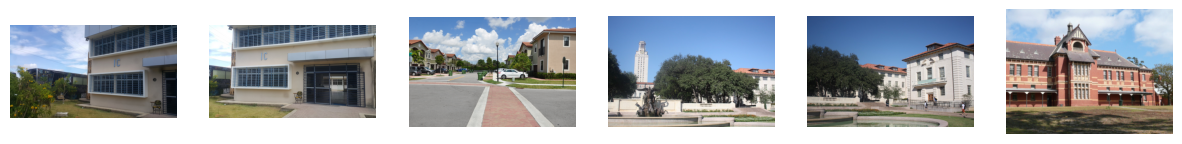

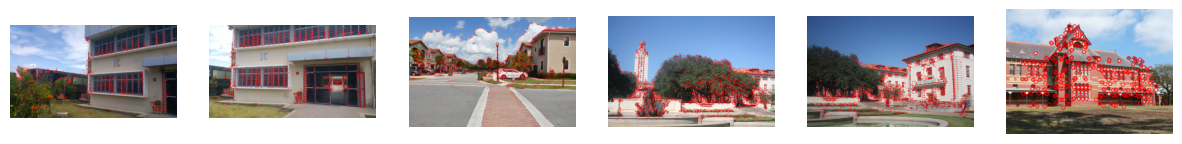

In [9]:
akaze_images = [draw_akaze(image) for image in images]

plot_compare(*images)

akaze = plot_compare(*akaze_images)
akaze.savefig("./results/akaze.jpg", dpi=400, bbox_inches='tight', pad_inches=0.1)